Loading files

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [3]:
df = pd.read_csv('all_data.csv')
print(df.head())
# print(df.columns)
print(len(df))
print(df.Country.unique())
print(df.describe(include='all'))
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
96
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
       Country         Year  Life expectancy at birth (years)           GDP
count       96    96.000000                         96.000000  9.600000e+01
unique       6          NaN                               NaN           NaN
top      Chile          NaN                               NaN           NaN
freq        16          NaN                               NaN           NaN
mean       NaN  2007.500000                         72.789583  3.880499e+12
std        NaN     4.633971                         10.672882  5.197561e+12
min   

1. Compare life expectancy per country how it was changing during time (line  plot)
2. Do the same with GDP (line plot)
3. Do box blot per country in the latest year to see medians and lowest and max
4. Correlation between GDP and life expectancy in a certain country? (lag graph) per country in subplots
5. You could see distribution amongst all countries for life expectancy at birth (years)
6. You could see distribution amongst all countries for GDP

In [ ]:
# plt.plot(df[df['Country'] == 'Chile'].Year, df[df['Country'] == 'Chile'].LEABY  )
sns.lineplot(x='Year', y='LEABY', data=df, hue='Country' )
plt.show()
plt.clf()


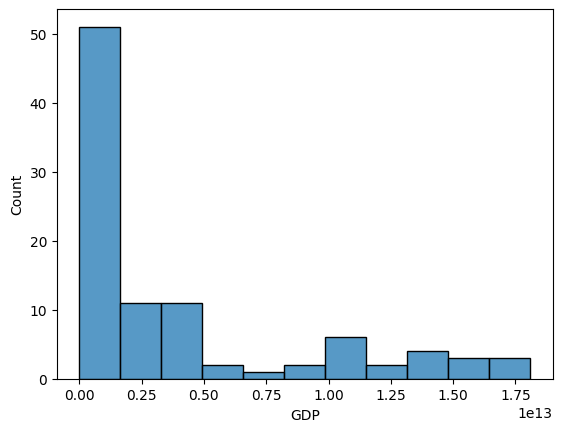

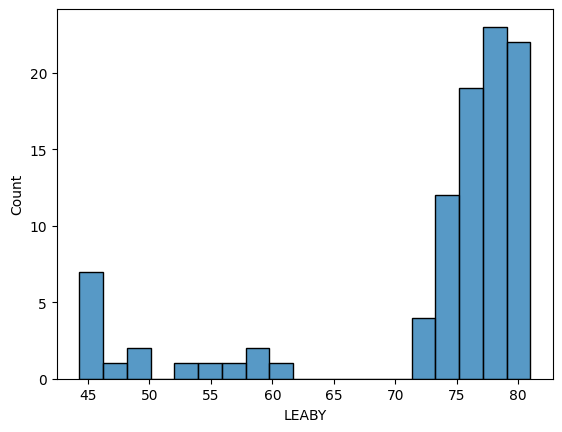

<Figure size 640x480 with 0 Axes>

In [15]:
sns.histplot(data=df, x='GDP')
plt.xlabel('GDP')
plt.show()
plt.clf()
sns.histplot(df, x='LEABY')
plt.xlabel('LEABY')
plt.show()
plt.clf()

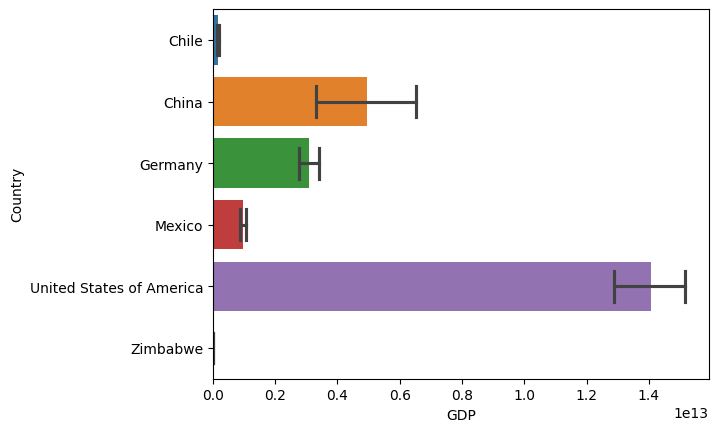

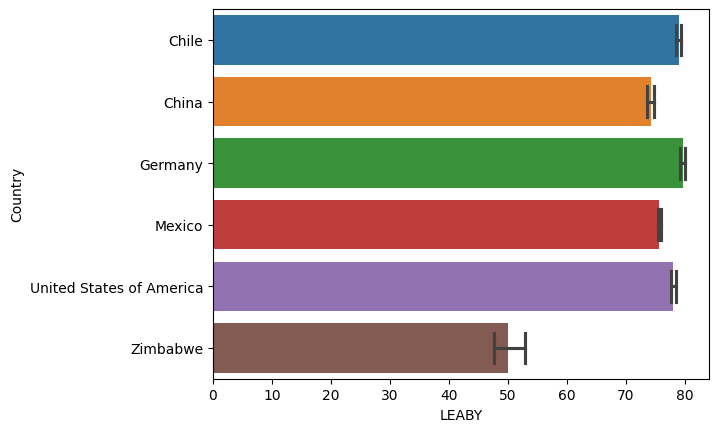

<Figure size 640x480 with 0 Axes>

In [26]:
## barplots for mean LEABY and GDP
df_grouped_country_mean = df.groupby('Country').mean()
# 
# sns.barplot(df_grouped_country_mean, x='GDP', y='Country', hue='Country')
sns.barplot(df, x='GDP', y='Country', hue='Country', capsize=0.5)
plt.show()
plt.clf()

sns.barplot(df, x='LEABY', y='Country', hue='Country', capsize=0.5)
plt.show()
plt.clf()

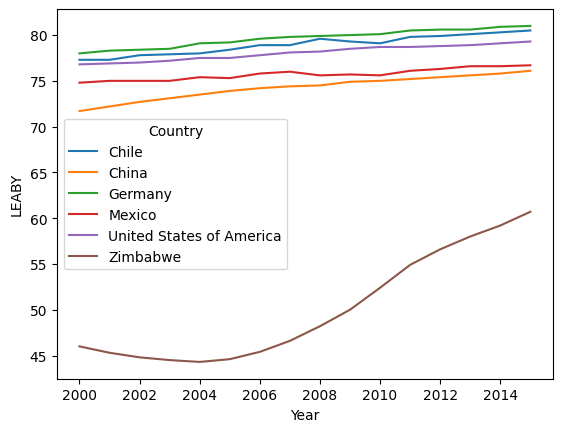

<Figure size 640x480 with 0 Axes>

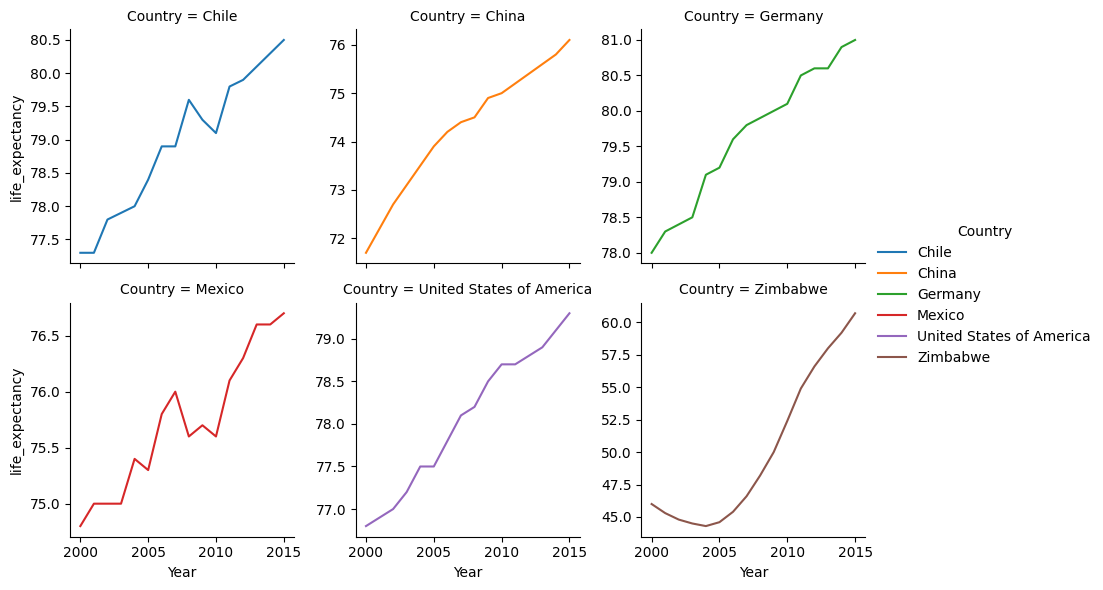

<Figure size 640x480 with 0 Axes>

In [4]:

graphLEABY = sns.FacetGrid(df, col='Country', col_wrap=3, hue = 'Country', sharey = False )

graphLEABY = (graphLEABY.map(sns.lineplot, 'Year', 'LEABY')
              .add_legend()
              .set_axis_labels('Year', "life_expectancy"))


plt.show()
plt.clf()

In all mentioned countries life expentancy at birth is growing slowly but steadily whereas for imbabwe it dropped slightli in years 2000-2004 and then grew rapidly from 44 years to around 60 in 2014. 

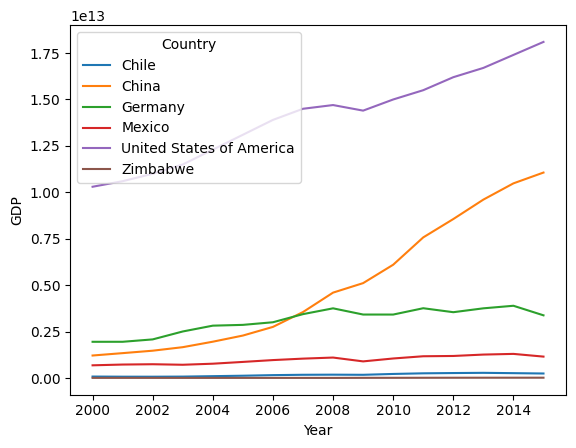

<Figure size 640x480 with 0 Axes>

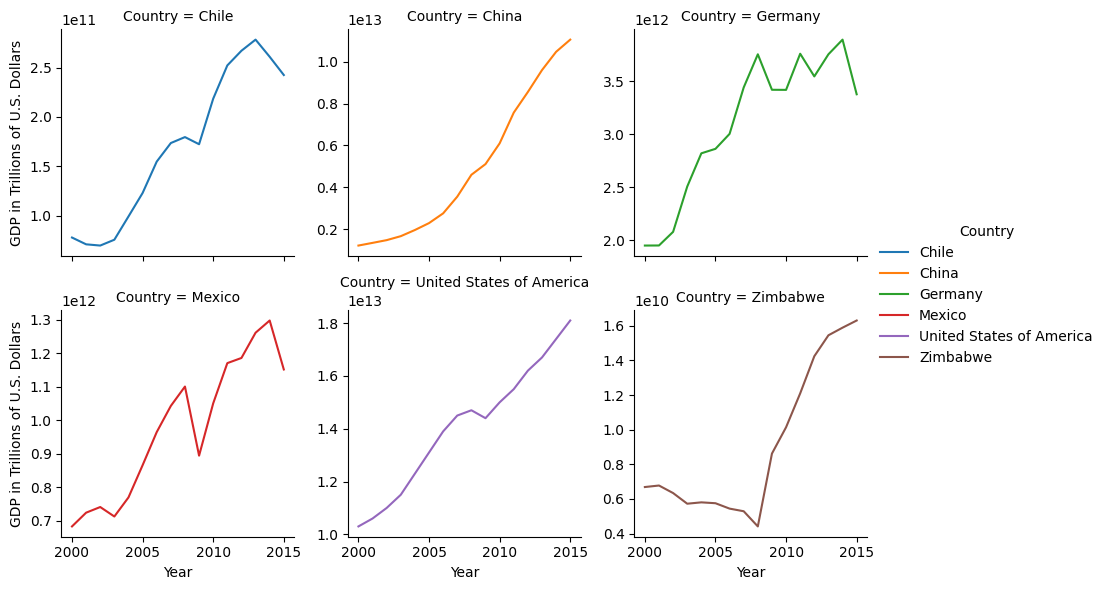

<Figure size 640x480 with 0 Axes>

In [5]:
# plt.plot(df[df['Country'] == 'Chile'].Year, df[df['Country'] == 'Chile'].GDP  )
sns.lineplot(x='Year', y='GDP', data=df, hue='Country' )
plt.show()
plt.clf()
# sns.FacetGrid(df, col_wrap=3, hue='Country', col='Country')
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))
plt.show()
plt.clf()


                     Country  Year  LEABY           GDP
14                     Chile  2014   80.3  2.609900e+11
30                     China  2014   75.8  1.048240e+13
46                   Germany  2014   80.9  3.890610e+12
62                    Mexico  2014   76.6  1.298460e+12
78  United States of America  2014   79.1  1.740000e+13


C:\Users\kunickae2883\AppData\Local\Temp\ipykernel_24184\1826965032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GDP',  data=df, palette='Accent')
C:\Users\kunickae2883\AppData\Local\Temp\ipykernel_24184\1826965032.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df.GDP, x=df.Country, palette='Accent')
c:\Users\kunickae2883\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\kunickae2883\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:

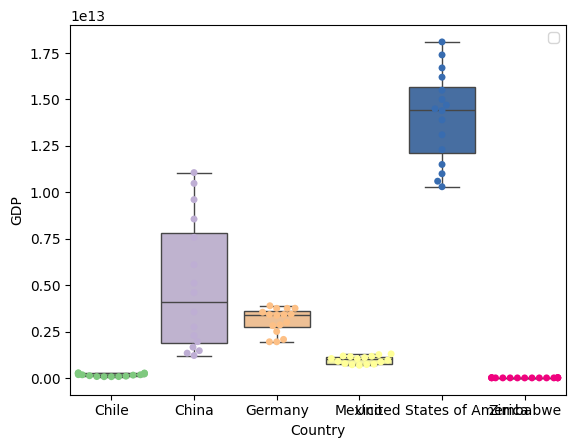

<Figure size 640x480 with 0 Axes>

In [6]:
y2014 = df[df.Year == 2014]
print(y2014.head())
sns.boxplot(x='Country', y='GDP',  data=df, palette='Accent')
sns.swarmplot(y=df.GDP, x=df.Country, palette='Accent')
plt.legend()
# sns.swarmplot(ax=axes[0], x=df.GDP, y=df.Country)

plt.show()
plt.clf()

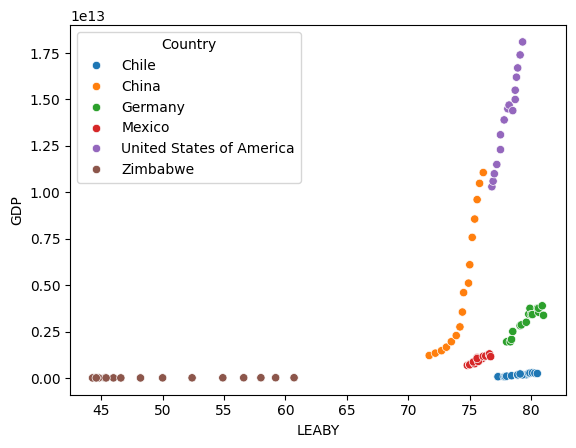

<Figure size 640x480 with 0 Axes>

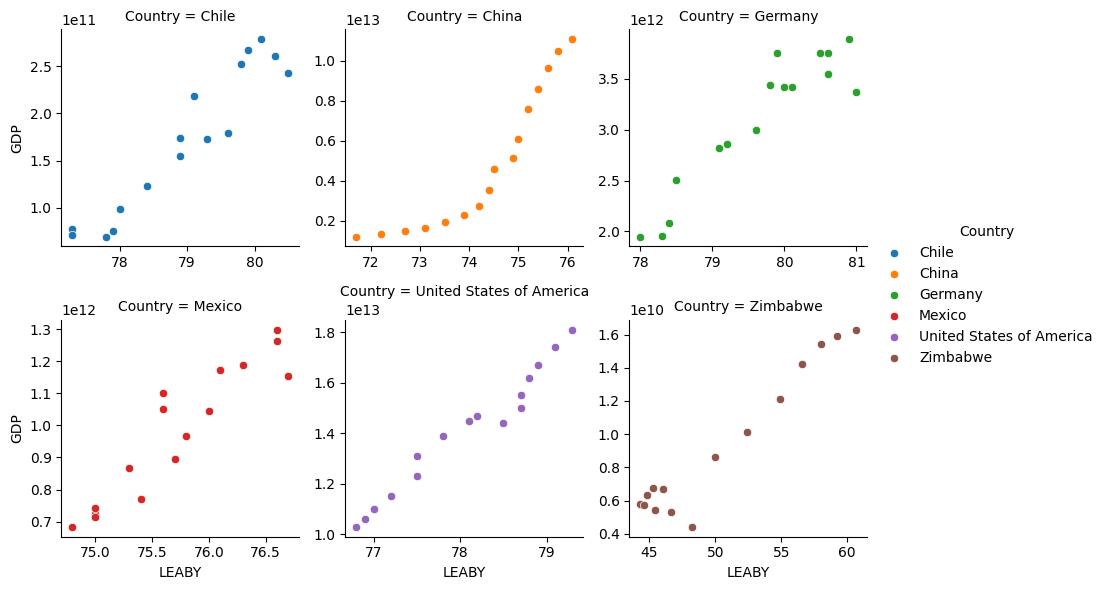

<Figure size 640x480 with 0 Axes>

In [12]:
# Coorelation between LEABY and GDP in each country 

# plt.plot(df[df['Country'] == 'Chile'].Year, df[df['Country'] == 'Chile'].GDP  )
sns.scatterplot(x='LEABY', y='GDP', data=df, hue='Country' )
plt.show()
plt.clf()

graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)

graphGDP = (graphGDP.map(sns.scatterplot,"LEABY","GDP")
         .add_legend()
         .set_axis_labels("LEABY", 'GDP'))
plt.show()
plt.clf()
